# Linear Regression Assignment

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

<ul>
    <li>
 Which variables are significant in predicting the demand for shared bikes.        
    </li>
<li>
 How well those variables describe the bike demands
    </li>
</ul>


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Data Preparation:

1. You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
2. You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

### Model Evaluation:

When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 ```
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
```
<ul>
<li>where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.</li>
<li>Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.</li>
    
</ul>




## Solution

The solution is divided into the following sections: 
- Data understanding &| exploration
- Data Visualisation 
- Data Preparation
- Model building & evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries & have a look at the dataset & understand the size, attribute names etc.

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [326]:
import warnings
warnings.filterwarnings('ignore')

In [327]:
# Read dataset
bs_ds= pd.read_csv('day.csv')
bs_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [328]:
# Shape of Dat
bs_ds.shape

(730, 16)

In [329]:
# Understanding the feature names in the dataset
bs_ds.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [330]:
# Getting insights of the features
bs_ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [331]:
# Summary of the dataset
bs_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<ul>
    <li>730 rows, 16 columns, no null values</li>
        <li>Except Dteday all other are int or float</li>
        <li>dteday needs to be converted to datetime</li>
        <li>There are catogorical columns which might need conversions</li>
</ul>


In [332]:
bs_ds['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

> Seasons values are not in correct format

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; Let us use those to convert categorical data

In [333]:
# Assign season values instead of numerical values for better data visualization 

#### day.csv have the following fields:
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [334]:
#Assign actual values to numerical representation
def ass_season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3: 
        return "fall"
    else: return "winter"

def ass_year(x):
    if x==0 : 
        return 2018
    else:
        return 2019

In [335]:
bs_ds['season'] = bs_ds['season'].apply(ass_season)

In [336]:
bs_ds['yr'] = bs_ds['yr'].apply(ass_year)


In [337]:
bs_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [338]:
bs_ds['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [339]:
bs_ds['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [340]:
bs_ds['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [341]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map(
    {
        1 : "Jan",
        2 : "Feb",
        3 : "Mar",
        4 : "Apr",
        5 : "May",
        6 : "Jun",
        7 : "Jul",
        8 : "Aug",
        9 : "Sep",
        10 : "Oct",
        11 : "Nov",
        12 : "Dec"
    }
    )

# Applying the function to the two columns
bs_ds['mnth'] = object_map(bs_ds['mnth'])
bs_ds['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [342]:
bs_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [343]:
# whether day is a holiday or not (0: No, 1: Yes)
def ass_holiday(x):
    if x==0 : 
        return "No"
    else:
        return "Yes"

bs_ds['holiday'] = bs_ds['holiday'].apply(ass_holiday)
bs_ds['holiday'].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [344]:
bs_ds['weekday'].value_counts()


weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [345]:
bs_ds.head(10)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,No,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,No,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,No,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,No,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,2018,Jan,No,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,2018,Jan,No,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,2018,Jan,No,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,2018,Jan,No,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,2018,Jan,No,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [346]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.

# From the above data Jan 1 2018 was Monday and its weekday value is given as 1
# Jan 7 2018 was Sunday and its weekday value is given as 0


def ass_weekday(x):
    return x.map(
    {
        0 : "Sun",
        1 : "Mon",
        2 : "Tue",
        3 : "Wed",
        4 : "Thur",
        5 : "Fri",
        6 : "Sat",
    }
    )

# Applying the function to the two columns
bs_ds['weekday'] = ass_weekday(bs_ds['weekday'])


In [347]:
bs_ds['weekday'].value_counts()


weekday
Mon     105
Tue     105
Wed     104
Thur    104
Fri     104
Sat     104
Sun     104
Name: count, dtype: int64

In [348]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
def ass_workday(x):
    if x==0 : 
        return "Holiday"
    else:
        return "No Holiday"

bs_ds['workingday'] = bs_ds['workingday'].apply(ass_workday)
bs_ds['workingday'].value_counts()

workingday
No Holiday    504
Holiday       226
Name: count, dtype: int64

In [349]:
# Change the wethersit column encoding to meaningful categories. This would change the dtype to object too.
bs_ds['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)
bs_ds['weathersit'].value_counts()


weathersit
Clear         463
Cloudy        246
Light Rain     21
Name: count, dtype: int64

In [350]:
# Convert dteday to datetime

bs_ds['dteday'] = pd.to_datetime(bs_ds['dteday'], format='%d-%m-%Y')


### 2. Data Visualisation

Let's **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity betn the data
- Identify the predictors directly have strong association with output var

We'll visualise our data using `matplotlib` and `seaborn`.

In [351]:
bs_ds.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

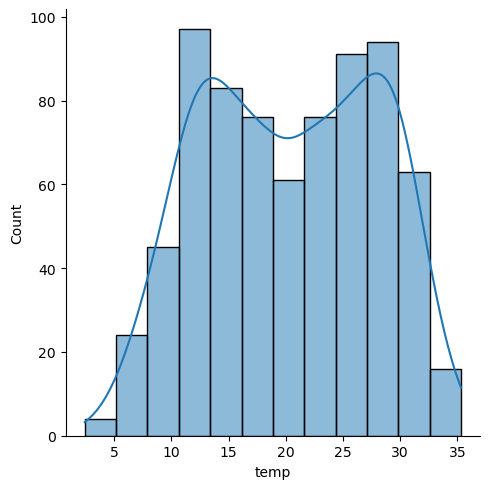

In [352]:
sns.displot(bs_ds, x="temp", kind="hist", kde=True)

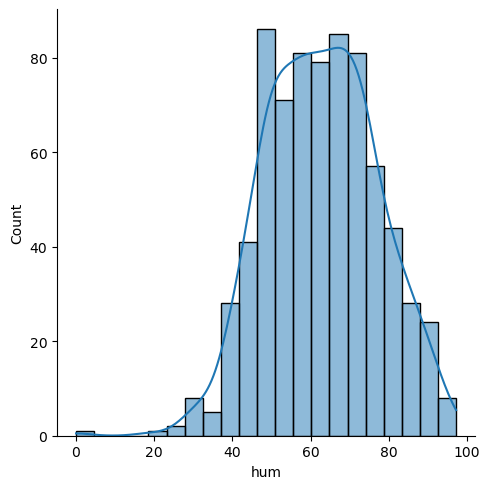

In [353]:
sns.displot(bs_ds, x="hum", kind="hist", kde=True)


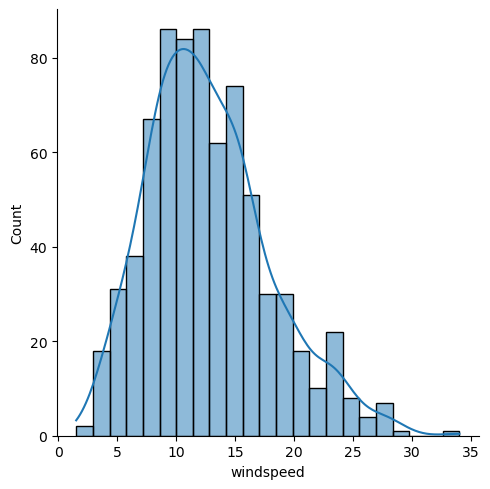

In [354]:
sns.displot(bs_ds, x="windspeed", kind="hist", kde=True)


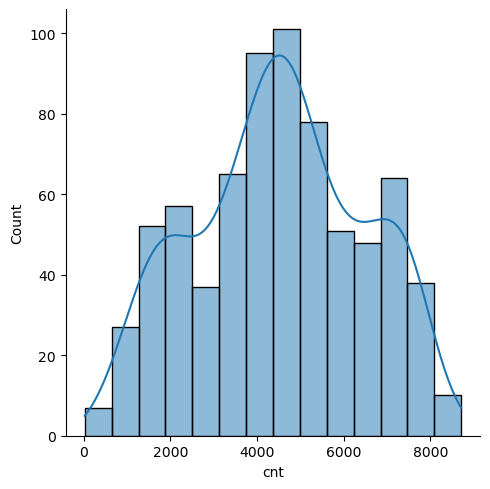

In [355]:
sns.displot(bs_ds, x="cnt", kind="hist", kde=True)


> The above graph shows how data is distributed 

In [356]:
bs_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [357]:
# Select all categorical clmns
bs_cat_ds = bs_ds[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [358]:
bs_cat_ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,No,Mon,No Holiday,Cloudy
1,spring,2018,Jan,No,Tue,No Holiday,Cloudy
2,spring,2018,Jan,No,Wed,No Holiday,Clear
3,spring,2018,Jan,No,Thur,No Holiday,Clear
4,spring,2018,Jan,No,Fri,No Holiday,Clear


#### Visualising Categorical Variables

Let's make a boxplot for categorical variables.

In [359]:
cat_colmns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [360]:
def plot_cat_subplots(data, bs_ds, y_val):
    n = len(data)
    cols = 3 #int(np.ceil(np.sqrt(n)))
    rows = int(np.ceil(n / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            if index < n:
                plt.subplot(3,3,index+1)
                sns.boxplot(x=data[index], y=y_val, data=bs_ds, palette="Spectral", orient="v")
            else:
                axs[i, j].axis('off')  # Turn off unused subplots

    plt.tight_layout()
    plt.show()

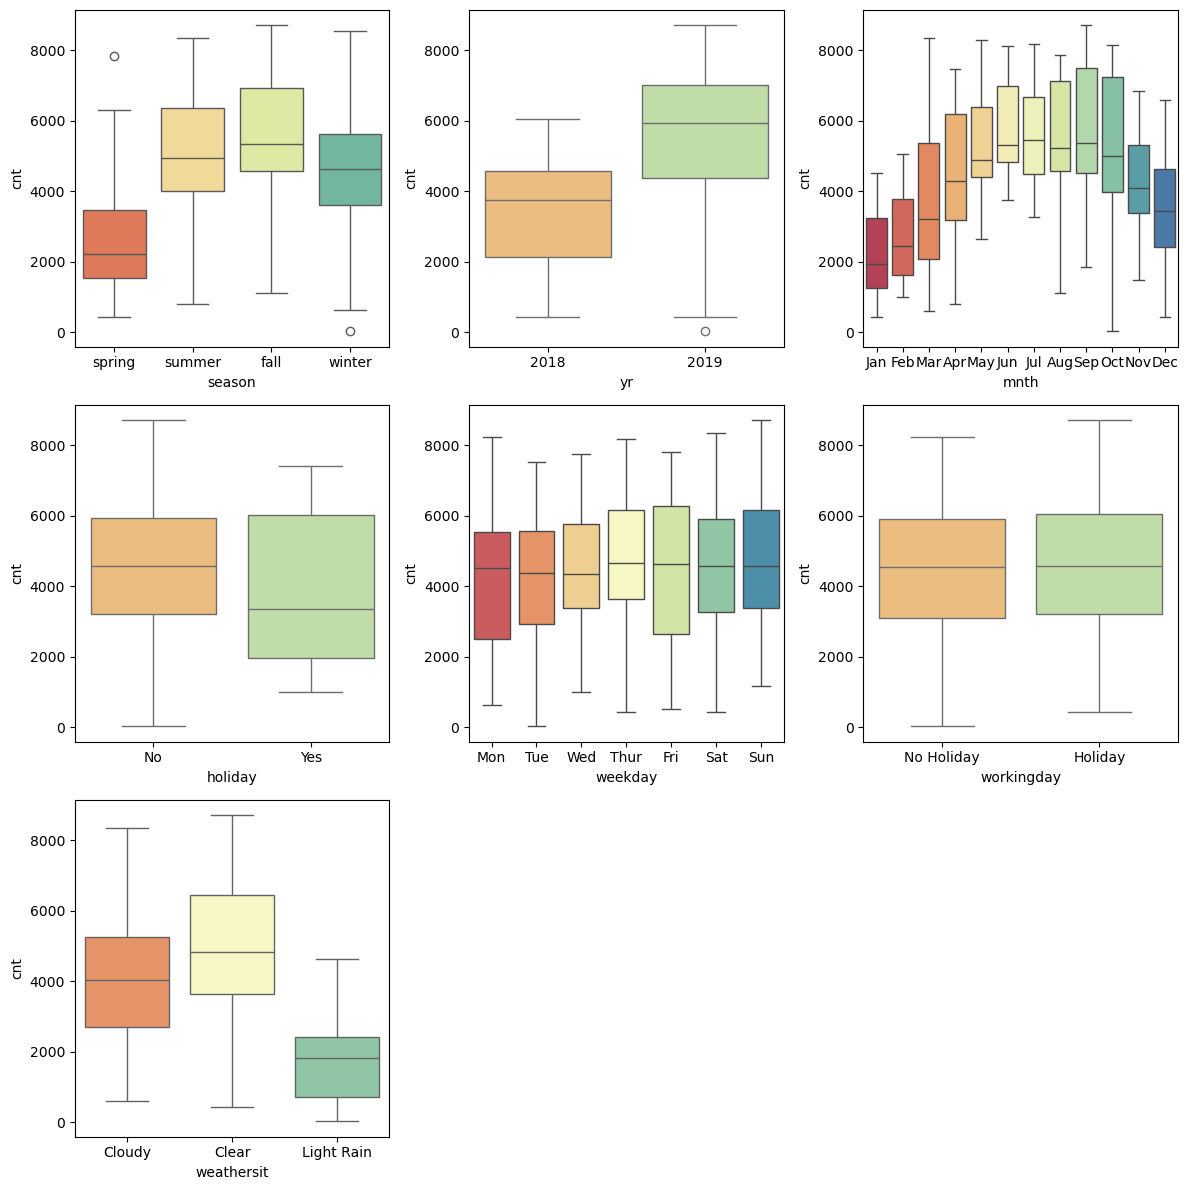

In [361]:
plot_cat_subplots(cat_colmns, bs_ds, 'cnt')

### Data analysis
- In spring season users are less
- Users in 2019 increased than 2018
- Mean count when there are no holidays is more than with holiday
- Mean count over weekdays is same
- Very few users prefer ride in rainy season

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [362]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# To keep same data type for all numerical variables

intVarList =  ['casual', 'registered', 'cnt']

for i in intVarList:
    bs_ds[i] = bs_ds[i].astype(float)


bs_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [363]:
num_colmns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [364]:
bs_numeric_ds = bs_ds [num_colmns] 
bs_numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    float64
 5   registered  730 non-null    float64
 6   cnt         730 non-null    float64
dtypes: float64(7)
memory usage: 40.1 KB


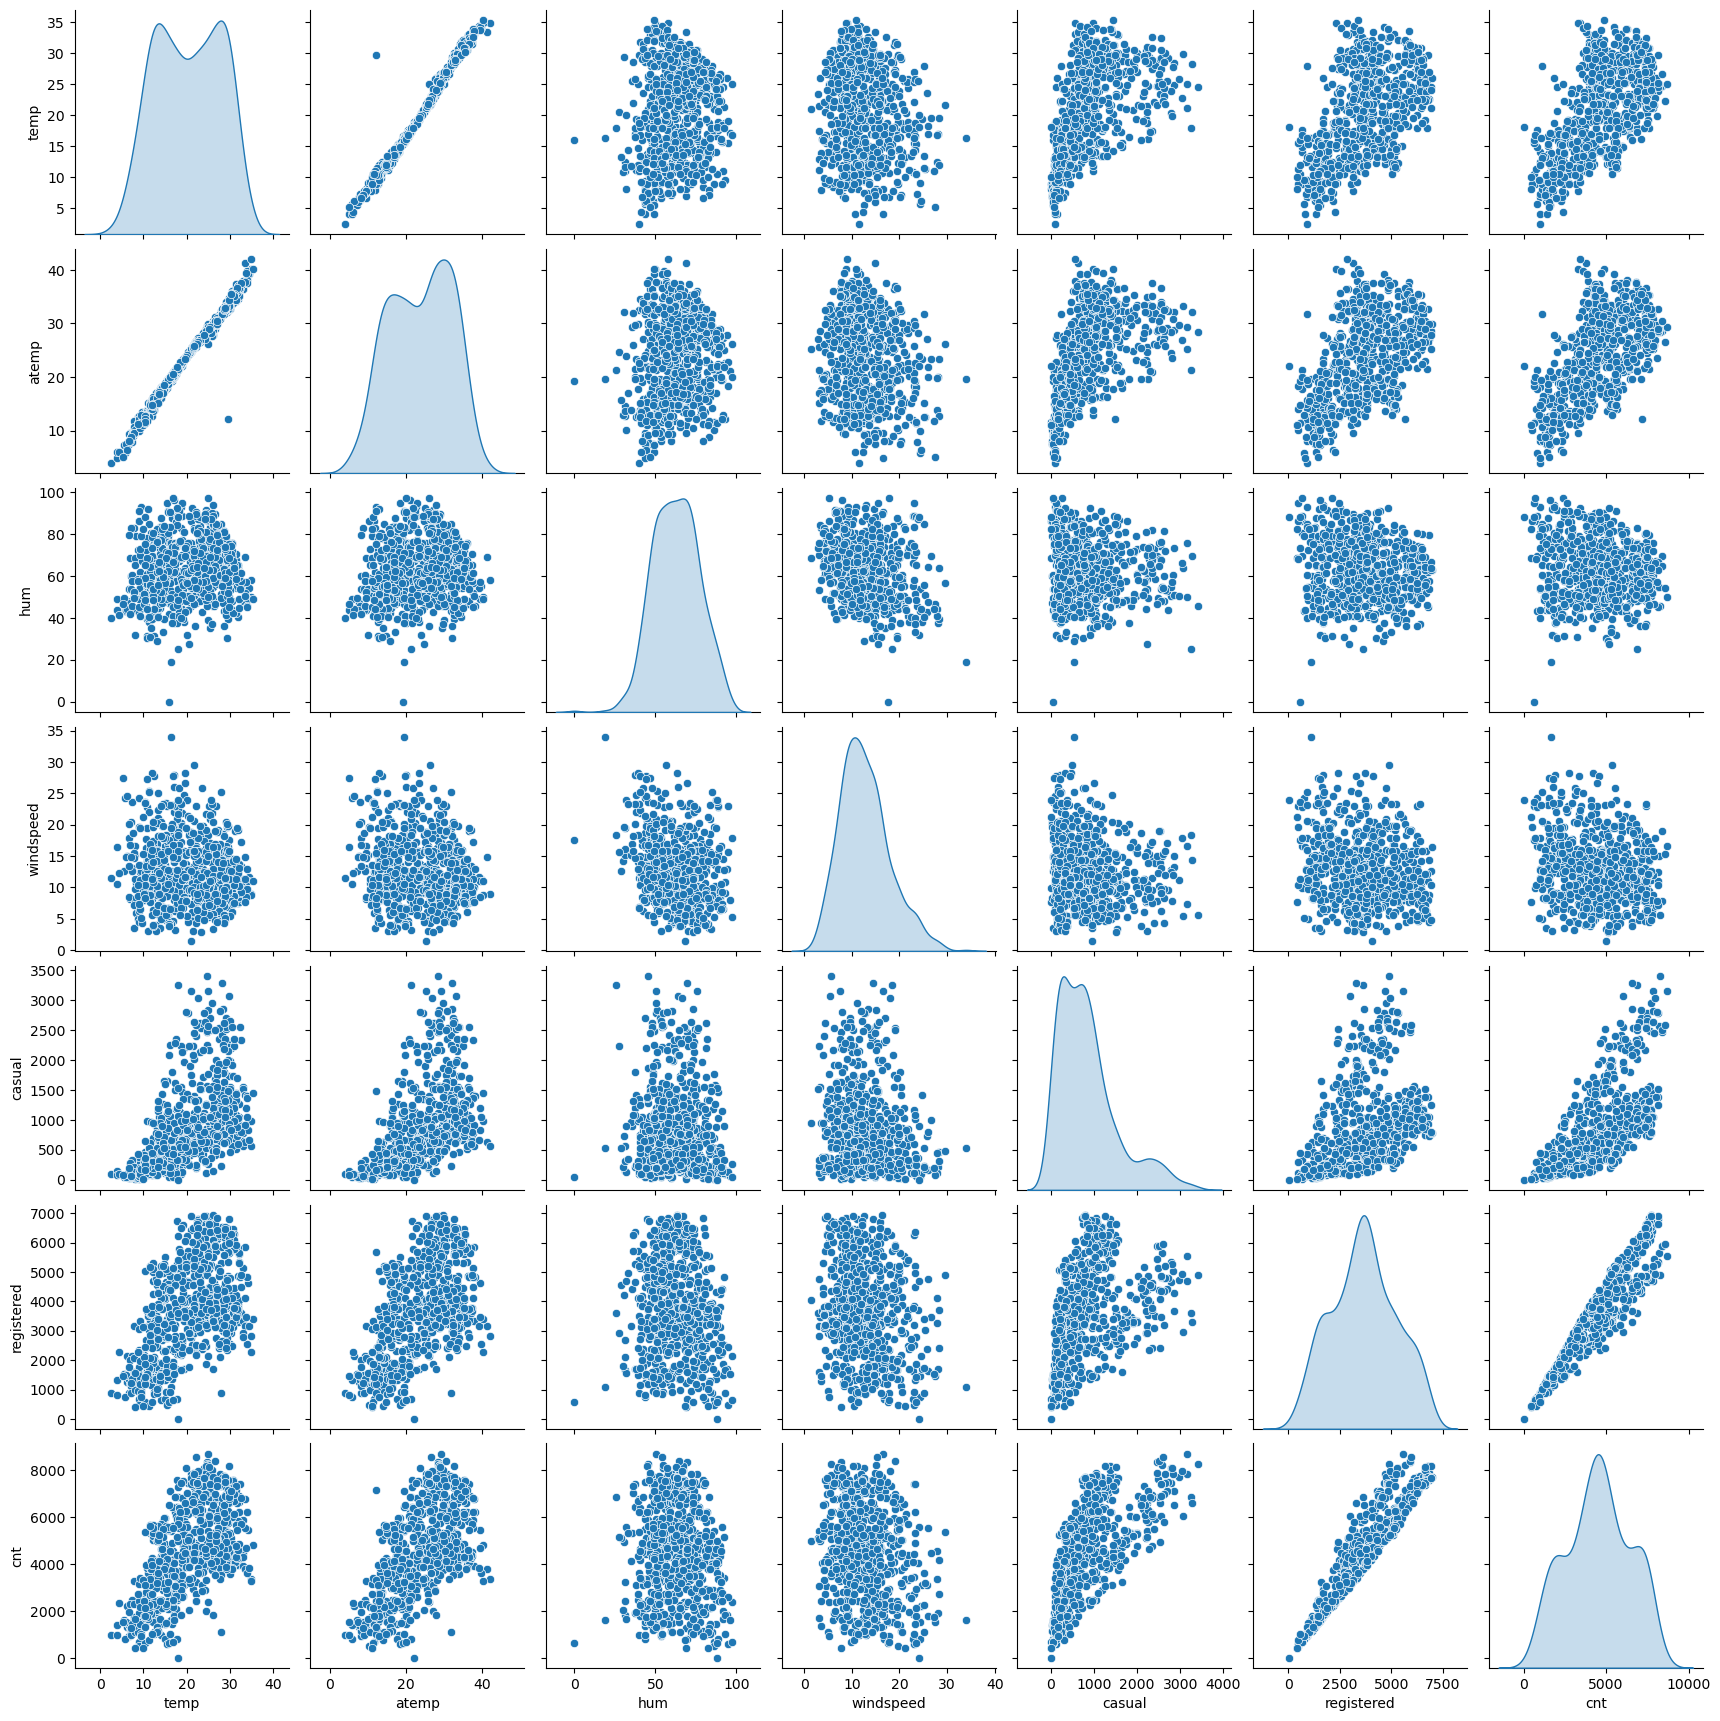

In [365]:
sns.pairplot(bs_numeric_ds, diag_kind='kde')
plt.show()

> Variables looks coorelated above but for better undestanding let us take correlation matrix.
> Let us use heatmap for visualising multiple correlation in one plot

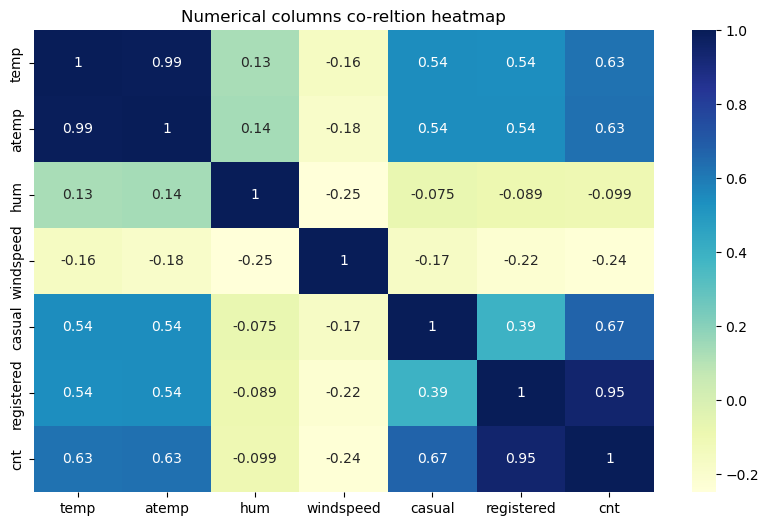

In [366]:
plt.figure(figsize=(10,6))
sns.heatmap(bs_numeric_ds.corr(),annot=True,cmap='YlGnBu')
plt.title("Numerical columns co-reltion heatmap")
plt.show()

In [367]:
bs_numeric_ds.corr()


,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


#### The heatmap reveals several valuable insights:

**Correlation of Count ('cnt') with Independent Variables:**
- **Count ('cnt')** shows a strong positive correlation with both **'casual'** and **'registered'** users, and also with **'atemp'**. This makes sense as the sum of 'registered' and 'casual' users constitutes the total count.
- There is a negative correlation between **Count** and **'windspeed'** (approximately -0.24). This suggests that the demand for shared bikes tends to decrease on windy days compared to normal days.

**Correlation Among Independent Variables:**
- Some independent variables exhibit high correlations, particularly in the top-left part of the matrix. For instance, **'atemp'** and **'temp'** are almost perfectly positively correlated, with a correlation close to 1.

Therefore, when building the model, it is crucial to consider multicollinearity.

In [368]:
# Let us remove atemp as it is highly correlated to temp
bs_ds.drop(columns=['atemp'], inplace = True)

## 3. Data Preparation 

#### Data Preparation
Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [369]:
bs_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Mon,No Holiday,Cloudy,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,spring,2018,Jan,No,Tue,No Holiday,Cloudy,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,spring,2018,Jan,No,Wed,No Holiday,Clear,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,spring,2018,Jan,No,Thur,No Holiday,Clear,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,spring,2018,Jan,No,Fri,No Holiday,Clear,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [370]:
bs_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(6)
memory usage: 85.7+ 

In [371]:
bs_ds['yr'] = bs_ds['yr'].astype(str)

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We will convert these levels into integers using `dummy variables`. Lets convert categorical data using dummy



In [372]:
status=pd.get_dummies(bs_ds[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True,dtype=int)
status.head()

,yr_2019,holiday_Yes,workingday_No Holiday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [373]:
# We then join orignal data and the dummy variable dataframe 'status'.
fn_ds=pd.concat([bs_ds,status],axis=1)
fn_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,1,2018-01-01,spring,2018,Jan,No,Mon,No Holiday,Cloudy,14.110847,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-01-02,spring,2018,Jan,No,Tue,No Holiday,Cloudy,14.902598,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-01-03,spring,2018,Jan,No,Wed,No Holiday,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-01-04,spring,2018,Jan,No,Thur,No Holiday,Clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-01-05,spring,2018,Jan,No,Fri,No Holiday,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [374]:
# We then drop the indivisual columns whose dummy variables have been created.
fn_ds=fn_ds.drop(['yr','holiday','workingday','season','mnth','weekday','weathersit'],axis=1)
fn_ds.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_Yes,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,1,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-01-02,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-01-03,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-01-04,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-01-05,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [375]:
# Let us drop 'instant' and 'dteday' columns as they are not useful for analysis
fn_ds = fn_ds.drop(['instant','dteday'],axis=1)

In [376]:
fn_ds.head()

,temp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_Yes,workingday_No Holiday,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
2,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [377]:
fn_ds.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'yr_2019',
       'holiday_Yes', 'workingday_No Holiday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [378]:
# As we know 'casual' and 'registered' sum up to 'cnt' value. So lets drop those and keep count
fn_ds = fn_ds.drop(['casual','registered'],axis=1)

In [379]:
fn_ds.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'yr_2019', 'holiday_Yes',
       'workingday_No Holiday', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

#### Splitting into test and trainning set
> Split the whole dataset into 80:20 trainning and testing set.

In [380]:
# Import libraries to train and test split
import sklearn
from sklearn.model_selection import train_test_split

In [381]:
df_train,df_test=train_test_split(fn_ds,train_size=0.8,random_state=0)
print(df_train.shape)
print(df_test.shape)

(584, 29)
(146, 29)


#### Re-scaling the variables
> We need to scale the numerical columns because they range from 12 to 1349 which would increase our processing time & also not give us clear co-efficients which can be easily calculated or infered. This can bring confussion.
> We can use MinMaxScaler and we dont need to do any processing on dummy vars

In [382]:
# Import libraries to scale all the variables
from sklearn.preprocessing import MinMaxScaler
# Create an object to be scaled
scaler=MinMaxScaler()

In [383]:
df_train.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'yr_2019', 'holiday_Yes',
       'workingday_No Holiday', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [384]:
df_train.head()

,temp,hum,windspeed,cnt,yr_2019,holiday_Yes,workingday_No Holiday,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
239,28.989419,56.1765,20.412153,4334.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
97,13.769153,83.6250,15.208464,1471.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
503,24.600000,45.6250,5.626325,8294.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
642,25.215000,62.7500,7.125450,8156.0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
498,23.506653,78.9583,14.250364,2843.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [385]:
# List of vars to be scaled
var_scale=['temp','hum','windspeed','cnt']

In [386]:
# Scale all the numeric variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,temp,hum,windspeed,cnt,yr_2019,holiday_Yes,workingday_No Holiday,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
239,0.807351,0.428211,0.657105,0.496088,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
97,0.344785,0.810325,0.462577,0.166705,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
503,0.673950,0.281322,0.104370,0.951680,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
642,0.692641,0.519721,0.160412,0.935803,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
498,0.640722,0.745359,0.426760,0.324551,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [387]:
##Scale test data with same scaler

df_test[var_scale]=scaler.transform(df_test[var_scale]) 
df_test.head()

,temp,hum,windspeed,cnt,yr_2019,holiday_Yes,workingday_No Holiday,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
196,0.781941,0.460557,0.415865,0.678900,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
187,0.860857,0.552784,0.292782,0.525771,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0.217065,0.340487,0.289684,0.141049,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
31,0.165779,0.801018,0.027323,0.153935,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
390,0.352054,0.717517,0.077873,0.466291,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [388]:
cor= df_train.corr()
print(cor)

                           temp       hum  windspeed       cnt   yr_2019  \
temp                   1.000000  0.141291  -0.138197  0.631203  0.058148   
hum                    0.141291  1.000000  -0.235669 -0.088646 -0.098610   
windspeed             -0.138197 -0.235669   1.000000 -0.232607 -0.025232   
cnt                    0.631203 -0.088646  -0.232607  1.000000  0.570116   
yr_2019                0.058148 -0.098610  -0.025232  0.570116  1.000000   
holiday_Yes           -0.016446 -0.006503  -0.028419 -0.051400 -0.019256   
workingday_No Holiday  0.017654  0.030099   0.008470 -0.052932 -0.025402   
season_spring         -0.610215 -0.210214   0.164781 -0.542935  0.009763   
season_summer          0.157823  0.027295   0.093398  0.132339 -0.032932   
season_winter         -0.241693  0.168476  -0.153980  0.037893  0.005932   
mnth_Aug               0.354234  0.019283  -0.062103  0.181653 -0.009096   
mnth_Dec              -0.287542  0.090329  -0.093401 -0.167079 -0.002887   
mnth_Feb    

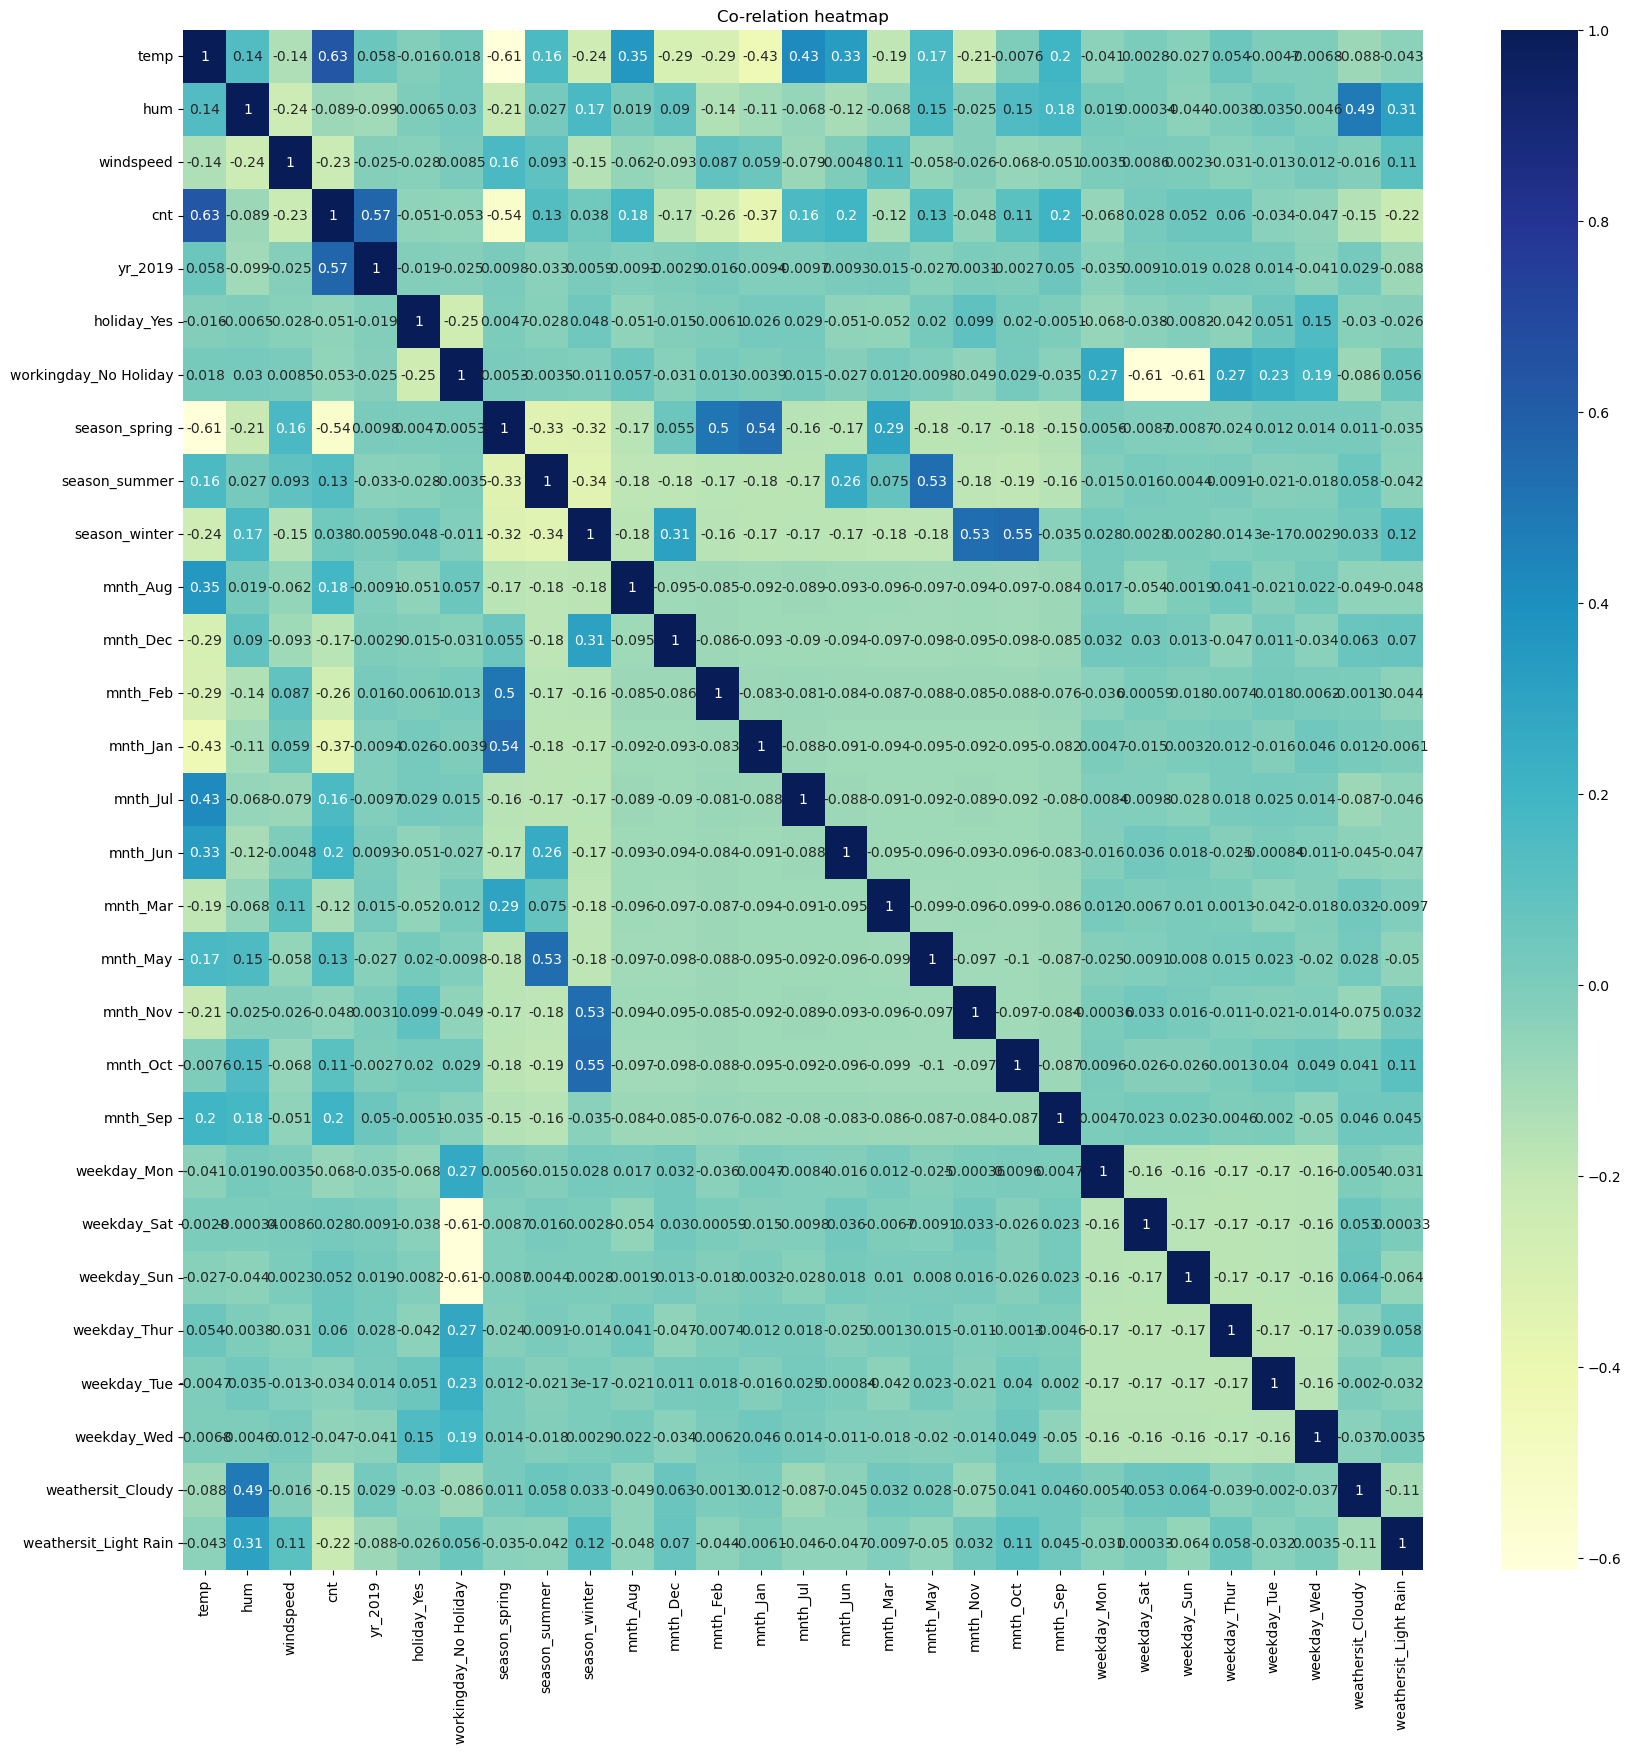

In [389]:

plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.title("Co-relation heatmap")
plt.show()

> It is difficult to analys so many parameters mannually. So let us use modeling technique to decide the imp params


## 4. Model Building and Evaluation

Let's start building the model. 

In [390]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [391]:
y_train = df_train.pop('cnt')
X_train = df_train

In [392]:
y_test = df_test.pop('cnt')
X_test = df_test

In [393]:
y_train.head()

239    0.496088
97     0.166705
503    0.951680
642    0.935803
498    0.324551
Name: cnt, dtype: float64

In [394]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [395]:
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=["Coefficient"])
coeff_df

,Coefficient
temp,0.439459
hum,-0.147315
windspeed,-0.142098
yr_2019,0.222058
holiday_Yes,-0.111393
workingday_No Holiday,-0.072788
season_spring,-0.093299
season_summer,0.006215
season_winter,0.074683
mnth_Aug,-0.016804


In [396]:
# Print the coefficients and intercept
lm.intercept_

0.41334126799233073

In [397]:
# Making Predictions
y_pred = lm.predict(X_test)
# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_pred
})
df

,Actual,Predicted
196,0.678900,0.463833
187,0.525771,0.538188
14,0.141049,0.126692
31,0.153935,0.116363
390,0.466291,0.418399
...,...,...
118,0.526116,0.504001
566,0.510469,0.418111
688,0.645651,0.585395
266,0.621376,0.561391


In [398]:
#Get errors
from sklearn import metrics

In [399]:
# Calculate error metrics
mae = metrics.mean_absolute_error(df['Actual'], df['Predicted'])
mse = metrics.mean_squared_error(df['Actual'], df['Predicted'])
rmse = np.sqrt(mse)

# Print error metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

r2 = metrics.r2_score(df['Actual'], df['Predicted'])
print('R² Score:', r2)

Mean Absolute Error: 0.06816731570654527
Mean Squared Error: 0.007594254229977475
Root Mean Squared Error: 0.0871450183887609
R² Score: 0.8704045149316653


In [400]:
yhat = lm.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R Squared', r_squared)
print('Adjusted R Squared', adjusted_r_squared)


R Squared 0.8373120128681546
Adjusted R Squared 0.8291043306344759


In [401]:
yhat = lm.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R Squared', r_squared)
print('Adjusted R Squared', adjusted_r_squared)


R Squared 0.8704045149316653
Adjusted R Squared 0.8393902108127476


#### This model is having Ajusted R-Squared value 83.9% which is pretty good
> But it would be nice if we can reduce no of features and exclude those which are not much relevant to our target variable

In [402]:
len(X_train.columns)

28

#### Model Building Using RFE
As we can see there are 28 features we cant keep them all and eliminate those manually. 
Let us build model using Recursive Feature Eliminataion to select features.
We'll first start off with an arbitrary number of features (20 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (As `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [403]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [404]:
#Run the RFE on 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [405]:
#List support columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr_2019', True, 1),
 ('holiday_Yes', True, 1),
 ('workingday_No Holiday', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 4),
 ('mnth_Mar', False, 6),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 9),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 5),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [406]:
#Building model using statsmodel, for the detailed statistics.

In [407]:
#Selected cols
X_train_cols_rfe =  X_train.columns[rfe.support_]
X_train_cols_rfe

Index(['temp', 'hum', 'windspeed', 'yr_2019', 'holiday_Yes',
       'workingday_No Holiday', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [408]:
#Non selected cols
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [409]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[X_train_cols_rfe]
X_train_rfe.head()

,temp,hum,windspeed,yr_2019,holiday_Yes,workingday_No Holiday,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weathersit_Cloudy,weathersit_Light Rain
239,0.807351,0.428211,0.657105,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0.344785,0.810325,0.462577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
503,0.673950,0.281322,0.104370,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
642,0.692641,0.519721,0.160412,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
498,0.640722,0.745359,0.426760,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [410]:
# Methods for building model and checkVIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

__MODEL 1:__

In [411]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.84e-205
Time:                        14:54:22   Log-Likelihood:                 589.41
No. Observations:                 584   AIC:                            -1137.
Df Residuals:                     563   BIC:                            -1045.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

- High P Value Hight VIF Drop
- High P Low VIF Remove this First
- Low P High VIF Remove these After
- Low P Low VIF Keep

> p-valeu of weekday_Mon, weekday_Sat, weekday_Sun, workingday_No Holiday seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [412]:
X = X_train_rfe.drop(["weekday_Mon","weekday_Sat","weekday_Sun","workingday_No Holiday"], axis = 1)

In [413]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 239 to 684
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   584 non-null    float64
 1   hum                    584 non-null    float64
 2   windspeed              584 non-null    float64
 3   yr_2019                584 non-null    int64  
 4   holiday_Yes            584 non-null    int64  
 5   season_spring          584 non-null    int64  
 6   season_winter          584 non-null    int64  
 7   mnth_Dec               584 non-null    int64  
 8   mnth_Feb               584 non-null    int64  
 9   mnth_Jan               584 non-null    int64  
 10  mnth_Jul               584 non-null    int64  
 11  mnth_May               584 non-null    int64  
 12  mnth_Nov               584 non-null    int64  
 13  mnth_Sep               584 non-null    int64  
 14  weathersit_Cloudy      584 non-null    int64  
 15  weathersi

__MODEL 2:__

In [414]:
X_train_new = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.93e-207
Time:                        14:55:05   Log-Likelihood:                 582.34
No. Observations:                 584   AIC:                            -1131.
Df Residuals:                     567   BIC:                            -1056.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

> We can see now all p values are below 0.05

In [415]:
## Now check VIF
checkVIF(X)

,Features,VIF
1,hum,14.77
0,temp,11.95
5,season_spring,4.22
2,windspeed,4.21
6,season_winter,2.96
14,weathersit_Cloudy,2.47
9,mnth_Jan,2.22
3,yr_2019,2.06
8,mnth_Feb,2.01
12,mnth_Nov,1.82


> We need VIF less than 5
> Humiduty is having very high VIF and very low p val. So let us drop it and check

__MODEL 3:__

In [416]:
X = X.drop(["hum"], axis = 1)

In [417]:
X_train_new = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     175.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.27e-201
Time:                        15:01:59   Log-Likelihood:                 566.93
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     568   BIC:                            -1032.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [418]:
checkVIF(X)

,Features,VIF
0,temp,5.22
1,windspeed,4.17
4,season_spring,3.95
5,season_winter,2.63
8,mnth_Jan,2.17
2,yr_2019,2.03
7,mnth_Feb,2.00
11,mnth_Nov,1.80
6,mnth_Dec,1.58
13,weathersit_Cloudy,1.52


> Month May has high P value lets drop it 0.162

__MODEL 4:__

In [420]:
X = X.drop(["mnth_May"], axis = 1)

In [421]:
X_train_new = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     187.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.41e-202
Time:                        15:07:53   Log-Likelihood:                 565.93
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     569   BIC:                            -1036.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [422]:
checkVIF(X)

,Features,VIF
0,temp,4.73
1,windspeed,4.17
4,season_spring,3.89
5,season_winter,2.55
8,mnth_Jan,2.17
2,yr_2019,2.03
7,mnth_Feb,2.00
10,mnth_Nov,1.80
6,mnth_Dec,1.57
12,weathersit_Cloudy,1.52


### Above model has p values less than 0.5 for all vars and VIF less than 5
- R-squared:                       0.822
- Adj. R-squared:                  0.817

In [313]:
# Residual Analysis of Model

In [425]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

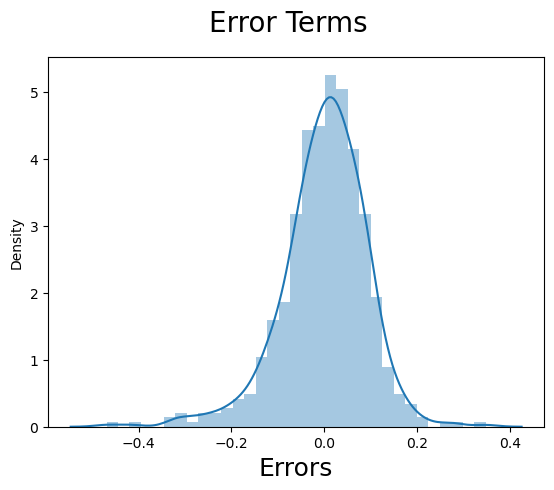

In [426]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train - y_train_pred)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

> Error terms seem to be aprx normally distributed, so the assumption on the Linear modeling seems to be fulfilled.

### Test set Evaluation

> We have already transformed our test data 

In [429]:
#y_test = df_test.pop('cnt')
#X_test = df_test

X_test_rfe =X_test[X.columns]

X_test_sm = sm.add_constant(X_test_rfe)

In [431]:
#Pred
y_test_pred = lm.predict(X_test_sm)

In [432]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8745954451464215

### So R2 score on test set is pretty good 0.87 and its nearly equal to train set 0.82

> These are the coeficient of every feature which decide the output variable It specifies how each feature actually impact output var
- const                     0.3059      
- temp                      0.3738      
- windspeed                -0.1136      
- yr_2019                   0.2305      
- holiday_Yes              -0.0542      
- season_spring            -0.0995      
- season_winter             0.0623      
- mnth_Dec                 -0.0694      
- mnth_Feb                 -0.0479      
- mnth_Jan                 -0.0697      
- mnth_Jul                 -0.0581      
- mnth_Nov                 -0.0724      
- mnth_Sep                  0.0446      
- weathersit_Cloudy        -0.0781      
- weathersit_Light Rain    -0.2696      